In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

import datetime
import operator
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
# import the dataset fro cases, deaths and recoveries
from google.colab import files
files.upload()

In [ ]:
# Store the datasets
confirmed_cases = pd.read_csv("time_series_covid19_confirmed_global.csv")

In [ ]:
# Looking at the columns, we see the dates start from the fourth column (0,1,2,3,4)
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/3/21', '10/4/21', '10/5/21', '10/6/21', '10/7/21', '10/8/21',
       '10/9/21', '10/10/21', '10/11/21', '10/12/21'],
      dtype='object', length=634)

In [ ]:
# Extract the dates columns for the three of the datasets
confirmed = confirmed_cases.loc[:,cols[4]:cols[-1]]

In [ ]:
# Creating a list containing the total cases for each day

dates = confirmed.keys()
world_cases = []

for i in dates:
  confirmed_sum = confirmed[i].sum()   # Summing up each of the dates columns to get the total no of cases for that day (same for deaths and recovered)
  
  world_cases.append(confirmed_sum)    # Append the total for each day to world cases

print("Global Cases: ", max(world_cases))

confirmed_sum   # Also gives the total no of world confirmed cases


Global Cases:  238704757


238704757

In [ ]:
# Work to build the model using polynomial regression
# Convert all dates and cases in the form on a nympy array
# Our start date is 22nd January 2020 and we will count the days from that starting point.
# So day 3 is 24th of January 2020
days = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)

In [ ]:
# Since we are predicting for the next couple of months
# future forecast basically contains our day numbers like day 0, day 1, 2, 3... 995 (max)
from datetime import datetime
future_days = len(pd.date_range(start="2021-10-13",end="2022-10-13"))
future_forecast = np.array([i for i in range(len(dates)+future_days)]).reshape(-1,1)  
adjusted_dates = future_forecast[:-future_days]

In [ ]:
min(world_cases)

array([557])

In [ ]:
# Shows the total numbers of days we have starting from [22 Jan, 2020] to [12 Oct, 2021] ~ 21 months (629/30 = 20.97) = adjusted dates-original no of days
print(max(future_forecast))
print(max(adjusted_dates))


[995]
[629]


In [ ]:
# Split data into training and testing sets (75% for training, 25% for testing the model)
x_train, x_test, y_train, y_test = train_test_split(days, world_cases, test_size = 0.25, shuffle=False)


In [ ]:
# Transform our data for polynomial regression
poly = PolynomialFeatures(degree=3)  
poly_x_train = poly.fit_transform(x_train)
poly_x_test= poly.fit_transform(x_test)
poly_future_forecast = poly.fit_transform(future_forecast)

In [ ]:
# Polynomial Regression
model = LinearRegression(normalize = True, fit_intercept = False)
model.fit(poly_x_train, y_train)
pred = model.predict(poly_x_test)  

# Tests our model to see how it did compared to the actualy Y values (y_test_confirmed)
#linear_pred = linear_model.predict(poly_future_forecast)        # Predicts cases for the new dates. future_forecast contains the old days with the new days

mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = math.sqrt(mse)
mape = np.mean(np.abs(pred - y_test)/np.abs(y_test))
print("RMSE:", rmse)
print("MAPE", mape)

RMSE: 17917552.77280478
MAPE 0.072837243784365


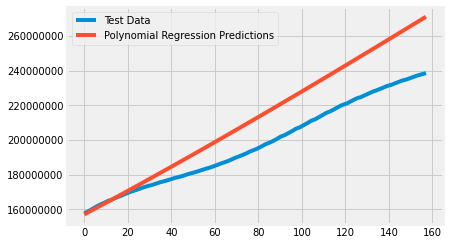

In [ ]:
# Plot to see the predictions for the 25% of the test data which is for ~ 157 days
plt.plot(y_test)
plt.plot(pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])
plt.ticklabel_format(style='plain')